In [11]:
import pandas as pd
path = '/Users/zhangpuchang/Downloads/anonymous-msweb.data'
data = pd.read_csv(path,  header=None)
print(data)

        0      1      2                                3            4
0       A   1287      1          International AutoRoute   /autoroute
1       A   1288      1                          library     /library
2       A   1289      1  Master Chef Product Information  /masterchef
3       A   1297      1                  Central America    /centroam
4       A   1215      1         For Developers Only Info   /developer
...    ..    ...    ...                              ...          ...
131654  V   1035      1                              NaN          NaN
131655  V   1001      1                              NaN          NaN
131656  V   1018      1                              NaN          NaN
131657  C  42711  42711                              NaN          NaN
131658  V   1008      1                              NaN          NaN

[131659 rows x 5 columns]


/var/folders/r1/m1k3791j6y7598kjmrl0fslr0000gn/T/ipykernel_98249/3061785650.py:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path,  header=None)


In [10]:
data.head()

,0,1,2,3,4
0,A,1287,1,International AutoRoute,/autoroute
1,A,1288,1,library,/library
2,A,1289,1,Master Chef Product Information,/masterchef
3,A,1297,1,Central America,/centroam
4,A,1215,1,For Developers Only Info,/developer


In [25]:
#1.数据处理与预处理
attr = data[data[0] == 'A']  # 属性行
case = data[data[0] != 'A']  # 案例行
print(case)

        0      1      2    3    4
294     C  10001  10001  NaN  NaN
295     V   1000      1  NaN  NaN
296     V   1001      1  NaN  NaN
297     V   1002      1  NaN  NaN
298     C  10002  10002  NaN  NaN
...    ..    ...    ...  ...  ...
131654  V   1035      1  NaN  NaN
131655  V   1001      1  NaN  NaN
131656  V   1018      1  NaN  NaN
131657  C  42711  42711  NaN  NaN
131658  V   1008      1  NaN  NaN

[131365 rows x 5 columns]


In [26]:
#缺失值处理
attr = attr.dropna()
print(attr)

     0     1  2                                3            4
0    A  1287  1          International AutoRoute   /autoroute
1    A  1288  1                          library     /library
2    A  1289  1  Master Chef Product Information  /masterchef
3    A  1297  1                  Central America    /centroam
4    A  1215  1         For Developers Only Info   /developer
..  ..   ... ..                              ...          ...
289  A  1219  1    Corporate Advertising Content         /ads
290  A  1030  1                Windows NT Server    /ntserver
291  A  1182  1                          Fortran     /fortran
292  A  1100  1                  MS in Education   /education
293  A  1210  1                      SNA Support  /snasupport

[294 rows x 5 columns]


In [28]:
case = case.drop(columns=[3, 4])
print(case)

        0      1      2
294     C  10001  10001
295     V   1000      1
296     V   1001      1
297     V   1002      1
298     C  10002  10002
...    ..    ...    ...
131654  V   1035      1
131655  V   1001      1
131656  V   1018      1
131657  C  42711  42711
131658  V   1008      1

[131365 rows x 3 columns]


In [30]:
case = case.dropna()
print(case)

        0      1      2
294     C  10001  10001
295     V   1000      1
296     V   1001      1
297     V   1002      1
298     C  10002  10002
...    ..    ...    ...
131654  V   1035      1
131655  V   1001      1
131656  V   1018      1
131657  C  42711  42711
131658  V   1008      1

[131365 rows x 3 columns]


In [31]:
tmp = {x[1]:x[3] for _,x in attr.iterrows()}
cases = []
votes = []
vote_tmp = []
case_tmp = 0
for i, line in case.iterrows():
    if line[0]=='C':
        if len(vote_tmp)!=0:
            votes.append(vote_tmp)
            cases.append(case_tmp)
        vote_tmp = []
        case_tmp = line[1]
    else:
        vote_tmp.append(tmp[line[1]])
votes.append(vote_tmp)
cases.append(case_tmp)

In [34]:
#2.频繁模式挖掘；
#找出频次最高的十个
from collections import Counter
counter = Counter()
for i in votes:
    counter.update(i)
result = counter.most_common(5)
for value, count in result:
    print(f"{value}: {count}")

Free Downloads: 10836
Internet Explorer: 9383
Microsoft.com Search: 8463
isapi: 5330
Products : 5108


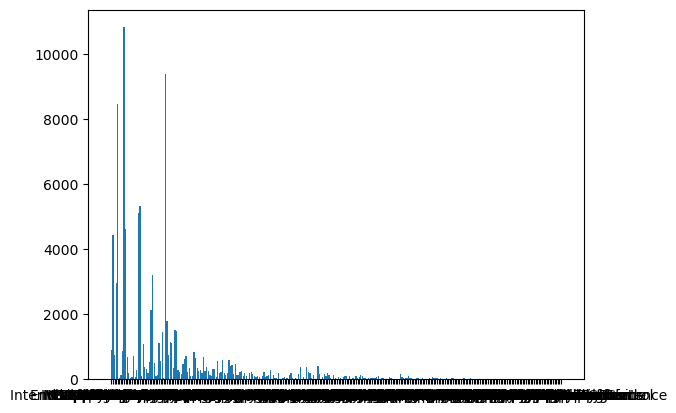

In [36]:
#可视化结果
import matplotlib.pyplot as plt
plt.bar(counter.keys(), counter.values())
plt.show()

In [43]:
# 3. 关联规则挖掘
#使用association_rules方法，导出关联规则，同时获得支持度及置信度
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
tmp = TransactionEncoder()
tmp_array = tmp.fit_transform(votes)
df = pd.DataFrame(tmp_array, columns=tmp.columns_)
frequent_itemsets = apriori(df, min_support=0.06, use_colnames=True)
min_threshold = 0.4  
association_results = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)


In [49]:
# 4. 结果评估
# 打印关联规则的支持度、置信度和提升度
input = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
association_results = association_results[input]
for index, row in association_results.iterrows():
    #print(row)
    antecedents = tuple(row['antecedents'])
    consequents = tuple(row['consequents'])
    print("%s ⇒ %s (suupport = %f, confidence = %f )" % (antecedents, consequents, \
          row['support'], row['confidence']))
print(association_results)

('Internet Explorer',) ⇒ ('Free Downloads',) (suupport = 0.160802, confidence = 0.560588 )
('Free Downloads',) ⇒ ('Internet Explorer',) (suupport = 0.160802, confidence = 0.485419 )
('Windows Family of OSs',) ⇒ ('Free Downloads',) (suupport = 0.077925, confidence = 0.550778 )
('isapi',) ⇒ ('Free Downloads',) (suupport = 0.073064, confidence = 0.448405 )
               antecedents          consequents   support  confidence  \
0      (Internet Explorer)     (Free Downloads)  0.160802    0.560588   
1         (Free Downloads)  (Internet Explorer)  0.160802    0.485419   
2  (Windows Family of OSs)     (Free Downloads)  0.077925    0.550778   
3                  (isapi)     (Free Downloads)  0.073064    0.448405   

       lift  
0  1.692267  
1  1.692267  
2  1.662652  
3  1.353616  


In [ ]:
#5 结果分析
1. Internet Explorer 与 Free Downloads强相关
2. Windows Family of OSs 与 Free Downloads 强相关

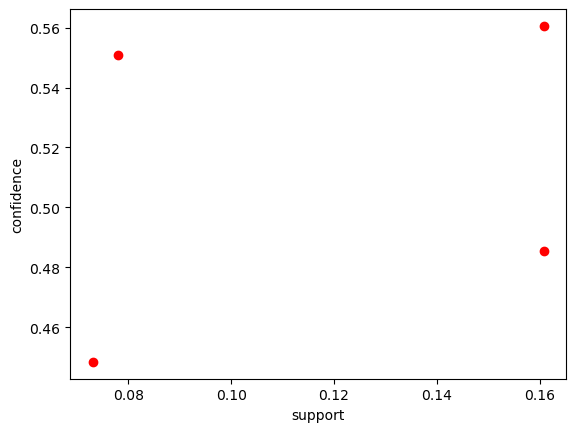

In [52]:

#6.可视化展示
plt.xlabel('support')
plt.ylabel('confidence')
for i in range(association_results.shape[0]):
    plt.scatter(association_results.support[i],association_results.confidence[i],c='r')